Data downloaded from:

http://people.duke.edu/~sf59/Srinivasan_BOE_2014_dataset.htm

The corresponding reference is:

* P. P. Srinivasan, L.A. Kim, P.S. Mettu, S.W. Cousins, G.M. Comer, J.A. Izatt, and S. Farsiu,
"Fully automated detection of diabetic macular edema and dry age-related macular degeneration from optical coherence tomography images",BioMedical Optics Express,5(10), pp. 3568-3577, 2014 

In [39]:
%matplotlib inline

import sys, time
import zipfile
from socket import gethostname

import numpy as np
import pylab as plt

from PIL import Image

from IPython.core.display import display

(512, 496)
image name: Publication_Dataset/AMD1/TIFFs/8bitTIFFs/023.tif


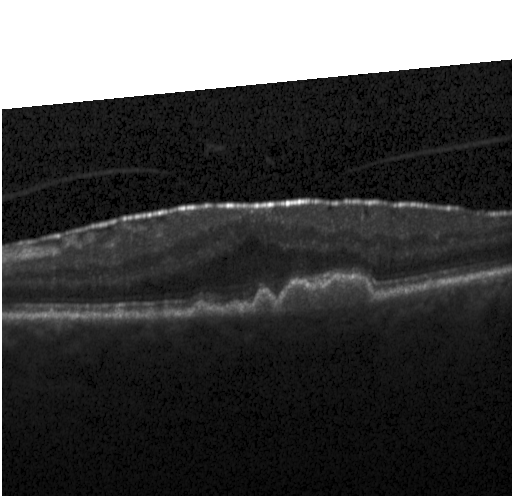

(496, 512)


In [34]:
fn = '2014_BOE_Srinivasan.zip'

zfd = zipfile.ZipFile(fn)
tiff_files = [x for x in zfd.namelist() if x.endswith('.tif')]

# take a look an an image
idx = 15
im = Image.open(zfd.open(tiff_files[idx]))
print(im.size); print('image name: %s' % tiff_files[idx])
display(im)
print(np.array(im).shape)

In [37]:
import keras

sys.path.append('../..')
import cnn_tools
import data_tools

weights_file = 'weights_epoch0019.hdf5'
tile_size = (256,256)

# load model
model = cnn_tools.create_unet((1, tile_size[0], tile_size[1]))
model.load_weights(weights_file)
print('model output size: ', model.output_shape)

model output size:  (None, 2, 256, 256)


In [55]:
tic = time.time()
X = np.array(im)
X = X[np.newaxis, np.newaxis, ...] / 255.

[X_subset, _] = data_tools.random_crop((X,X), tile_size)
print('[info]: X_test shape: ', X_subset.shape)

Y_hat = cnn_tools.deploy_model(X_subset, model)
print('[info]: Y_hat.shape: ', Y_hat.shape)
print('[info]: total time to deploy on system "%s": %0.2f sec' % (gethostname(), (time.time() - tic)))

[info]: X_test shape:  (1, 1, 256, 256)
[info]: Y_hat.shape:  (1, 7, 256, 256)
[info]: total time to deploy on system "pekalmj1-ml2": 1.14 sec


(256, 256)


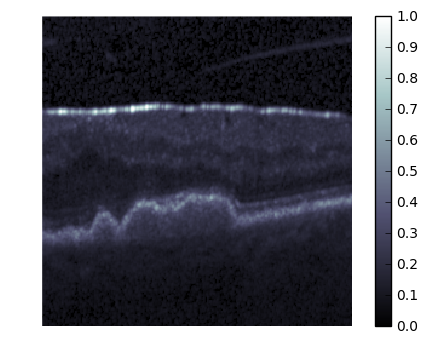

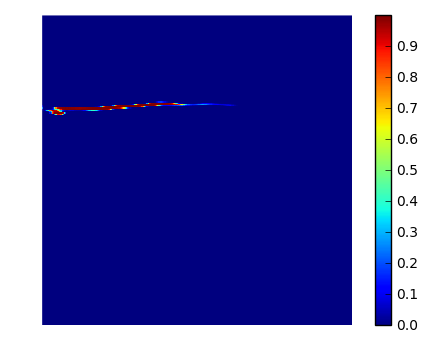

In [60]:
Y_hat_pos = Y_hat[0,1:,...]
Y_hat_pos = np.max(Y_hat_pos,axis=0)
print(Y_hat_pos.shape)

plt.figure()
plt.imshow(np.squeeze(X_subset), interpolation='none', cmap='bone')
plt.colorbar()
plt.axis('off')

plt.figure()
plt.imshow(Y_hat_pos, interpolation='none')
plt.axis('off')
plt.colorbar()
plt.show()